In [25]:
import broadlink
import broadlink.remote as remote
import base64
import statistics
import collections
import matplotlib.pyplot as plt

In [26]:
sample_radio_command_b64 = "sMC6A2ibBgAMChYVCwoXFAwKFhULFQsKFwkXChYVCwoWChYLFQsVFgsKFgoVFwoLFRYLChYKFRYLCxUAAUYKFgkMFRYKCxUXCgsVFgoWCgsVCxULFhYKCxULFQsWCxUWBw4VCxYVCgsVFgsLFRYLChYKFQABRgsWCgsVFgoLFRYLChYWChYKCxUJFwsVFgsLFQsVCxULFRYLCxULFRYKCxUWCgoXFgoLFQkXAAFGChcKChYWCgsVFgoLFRYKFgsLFQsVCxUWCgsWChYLFQsVFgoLFQsVFwoLFRYKCxUWCgsVDBUAAUYKFgoLFRYKCxYWCgsVFgoWCgsWChUMFRYKCxULFQsWChYWCgsVCxUUDAwUFwkMFRYKCxULFQABRQsVCwwVFQsLFRULCxUVDBULCxULFQsVFQsLFgoWCxULFRULCxUMFRULCxUVCwsVFgsKFgsVAAFFCxULCxYUDAoWFQsLFRULFQwKFgsVCxUVCwsVCxULFQwVFQsLFQsVFQsMFRQMCxUVCwsVCxUAAUUMFAwLFRULCxUVCwsVFgsVCwsVCxULFRULDBULFQsVCxUWCgsVDBUVCwsVFQsLFRUMCxULFQABRQsVCwoWFQsKFxULChYVCxULChcJFwkXFQsKFgoWChcJFhYLChYKFhULChYVDAoWFQsKFgsVAAFFCxULCxYVCwoWFQsKFxQMFQsKFgoWChYVCwoXChYKFgoWFQsKFgoWFgsKFhULChYVCwoWCxYAAUULFQsKFhULChcVCwoWFQsVCwoWChcKFhULChYKFgoWChcVCwoWChYVCwoWFQsLFhULChYKFgABRQwUCwoWFgoLFhULChYVDBQMCRYLFgoWFQsKFgsWChULFRYLChYLFRYLChUWCwoWFQsKFwoWAAFFChYKCxUWCgsWFQsLFRYKFgoLFgoWCxUWCgsVCxULFgsVFgoLFQsVFgoLFhYKCxUWCgsVCxUAAUYLFgoLFRYKCxUWCgsWFQsWCgsVCxULFRYLCxULFQsVCxUWCgsWCxUWCgsVFgoLFRcJDBULFQABRgoWCgsVFgsKFhYKCxUWCxUKCxUMFQsVFgoLFQsVDBQMFRYKCxULFRYLChYWCgsVFgoLFQsWAAFFChYLCxUVCwsWFQsLFRULFQsLFQsVCxYUDAsVCxULFQsVFQsMFQsVFgoLFRULCxUWCwsVCxUAAUULFQsLFhULCxUVCwsVFQsVCwwVCxULFRULCxULFgsVCxUVCwsVCxUVDAoWFQsLFRULCxYKFgAF3A=="
sample_radio_command = base64.b64decode(sample_radio_command_b64)

In [27]:
device = broadlink.hello("192.168.1.89")
device.auth()
device

broadlink.remote.rm4pro(('192.168.1.89', 80), mac=b'\xe8pr\x08l\xf1', devtype=21003, timeout=10, name='Rm4 pro', model='RM4 pro', manufacturer='Broadlink', is_locked=False)

[689, 361, 328, 755, 656, 394, 328, 722, 689, 361, 689, 361, 328, 755, 295, 755, 328, 722, 689, 361, 328, 722, 328, 722, 361, 689, 361, 689, 722, 361, 328, 722, 328, 689, 755, 328, 361, 689, 722, 361, 328, 722, 328, 689, 722, 361, 361, 689, 10705, 328, 722, 295, 394, 689, 722, 328, 361, 689, 755, 328, 361, 689, 722, 328, 722, 328, 361, 689, 361, 689, 361, 722, 722, 328, 361, 689, 361, 689, 361, 722, 361, 689, 722, 229, 459, 689, 361, 722, 689, 328, 361, 689, 722, 361, 361, 689, 722, 361, 328, 722, 328, 689, 10705, 361, 722, 328, 361, 689, 722, 328, 361, 689, 722, 361, 328, 722, 722, 328, 722, 328, 361, 689, 295, 755, 361, 689, 722, 361, 361, 689, 361, 689, 361, 689, 361, 689, 722, 361, 361, 689, 361, 689, 722, 328, 361, 689, 722, 328, 328, 755, 722, 328, 361, 689, 295, 755, 10705, 328, 755, 328, 328, 722, 722, 328, 361, 689, 722, 328, 361, 689, 722, 328, 722, 361, 361, 689, 361, 689, 361, 689, 722, 328, 361, 722, 328, 722, 361, 689, 361, 689, 722, 328, 361, 689, 361, 689, 755, 328, 361

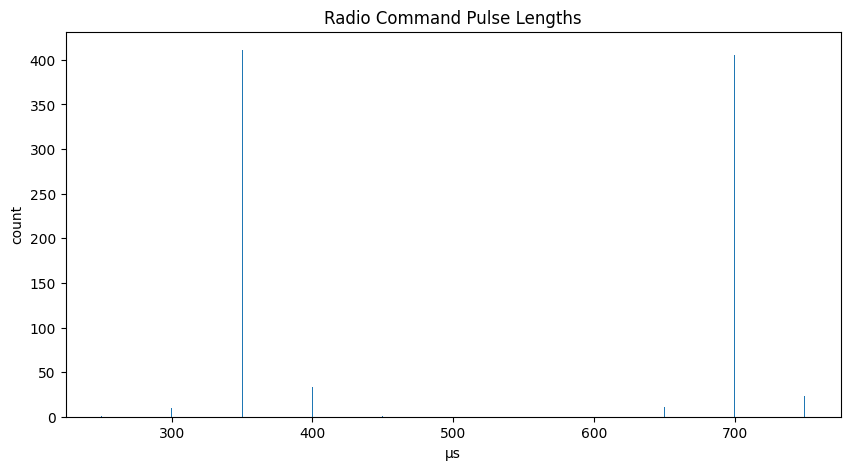

In [28]:
pulses = remote.data_to_pulses(sample_radio_command)
pulses = pulses[5:] # skip the first 5 pulses which are usually noise
bins = collections.Counter(round(t/50)*50 for t in pulses)  # bucket by 50 µs
#filter out pulses too long
bins = {k: v for k, v in bins.items() if k < 2000}  # filter out pulses longer than 10 ms
print(pulses)
plt.figure(figsize=(10, 5))
plt.bar(bins.keys(), bins.values())
plt.xlabel("µs")
plt.ylabel("count")
plt.title("Radio Command Pulse Lengths")
plt.show()


In [29]:
# ------------------------------------------------------------------
# 2.  Auto-detect “short” and “long” pulse widths
# ------------------------------------------------------------------
# Keep only pulses in a plausible OOK range (skip huge sync gaps)
candidates = [p for p in pulses if 100 < p < 2_000]

# Bucket the pulses in 50-µs bins so tiny jitter doesn’t fragment counts
bucketed = [round(p/50)*50 for p in candidates]

# Get the two most common bucket centres
most_common_two = collections.Counter(bucketed).most_common(2)
if len(most_common_two) < 2:
    raise RuntimeError("Could not find two distinct pulse widths")

# Sort so short_us < long_us
(short_us, _), (long_us, _) = sorted(most_common_two, key=lambda kv: kv[0])

threshold = (short_us + long_us) / 2      # midpoint for classifying marks/spaces
print(f"short ≈ {short_us} µs   long ≈ {long_us} µs   threshold = {threshold:.0f} µs")

short ≈ 350 µs   long ≈ 700 µs   threshold = 525 µs


In [ ]:
##############################################################################
# 3.  Pair up mark/space values
##############################################################################
pairs = list(zip(pulses[0::2], pulses[1::2]))
# skip first 7 pairs (pre-amble)
#pairs = pairs[7:]
bits = []
collecting = False                # start AFTER pre-amble
for mark, space in pairs:
    mark_long  = mark  > threshold
    space_long = space > threshold

    # Classify the pair
    if not mark_long and space_long:         # short–long  → 0
        bit = 0
    elif mark_long and not space_long:       # long–short  → 1
        bit = 1
    else:                                    # invalid pair (long–long, short–short)
        if collecting:                       # already inside data -> frame ended
            break
        else:
            continue                         # still in pre-amble; keep looking

    collecting = True
    bits.append(bit)

print(f"Bits collected: {len(bits)}\n{bits}")

Bits collected: 456
[1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1

In [31]:
# 5.  Parse TR198A fields – adjust slices if your model differs
if len(bits) < 45:
    raise RuntimeError("Not enough bits decoded; tune threshold or gap logic.")

tx_id_bits  = bits[0:32]
light_bit   = bits[32]
dir_bit     = bits[33]              # 0 = forward, 1 = reverse
speed_bits  = bits[34:37]           # 3-bit speed
checksum    = bits[37:45]

tx_id  = int("".join(map(str, tx_id_bits)), 2)
speed  = int("".join(map(str, speed_bits )), 2)

print("\n────────── Decoded Frame ──────────")
print(f"Tx ID       : 0x{tx_id:08X}")
print(f"Light       : {'ON' if light_bit else 'OFF'}")
print(f"Direction   : {'REV' if dir_bit else 'FWD'}")
print(f"Speed index : {speed}  (0=off, 1=low …)")
print(f"Checksum raw: {checksum}")


────────── Decoded Frame ──────────
Tx ID       : 0xAC4252D5
Light       : ON
Direction   : FWD
Speed index : 1  (0=off, 1=low …)
Checksum raw: [0, 0, 0, 0, 1, 0, 0, 1]
